# BANGLORE REAL ESTATE PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [2]:
df = pd.read_csv('./Dataset/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

# EXPLORATORY DATA ANALYSIS

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# lets drop the unwanted columns

In [6]:
df.drop(['area_type', 'availability', 'society', 'balcony'], axis = 1, inplace = True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.shape

(13246, 5)

In [10]:
df['size'].nunique()

31

In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
# Now extract the bhk values and make it as a single column

In [13]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
# In the bhk the data set have 27, 43 bhk's, so it may be flat

df[df['bhk'] > 15]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [16]:
# now check the total_sqft

df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
# see the total_sqft has a some range sunctions in that, so lets check that.

def check_value(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
# to check the false value, we use tilde symbol, lets see/

df[~df['total_sqft'].apply(check_value)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [19]:
# so our dataset has a range values in the total_sqft
# for this case we going to split out and extract the two values first
# then we going to find the median value and place it in the dataset

In [20]:
df1 = df

In [21]:
def convert_to_float(x):
    a = x.split('-')
    
    if(len(a) == 2):
        return (float(a[0]) + float(a[1])) / 2
    try:
        return float(x)
    except:
        return None

In [22]:
df['total_sqft'] = df['total_sqft'].apply(lambda x: convert_to_float(x))

In [23]:
convert_to_float('2100 - 2850')

2475.0

In [24]:
convert_to_float('36sq.meter')

In [25]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
# total_sqft is succefully converted
# but the total_sqft has some datas like '36sq.meter', so they become NaN values in dataset
# so lets drop that

In [27]:
df.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [28]:
df.dropna(inplace = True)

In [29]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [30]:
# lets find price per sqft.

In [31]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

In [32]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [33]:
# yes its done
# lets check the location

In [34]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [35]:
len(df.location.unique())

1298

In [36]:
df['location'] = df.location.apply(lambda x: x.strip())
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [37]:
loc = df.groupby('location')['location'].agg('count').sort_values(ascending = False)
loc

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [38]:
len(loc[loc <= 10])

1047

In [39]:
# we just change the locations which has lower count(which is <= 10) to other

In [40]:
loc_other = loc[loc <= 10]
loc_other

location
Dodsworth Layout        10
BTM 1st Stage           10
Sadashiva Nagar         10
Thyagaraja Nagar        10
Kalkere                 10
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1047, dtype: int64

In [41]:
df.location.nunique()

1287

In [42]:
df['location'] = df.location.apply(lambda x: 'other' if x in loc_other else x)
df.location.nunique()

241

In [43]:
# see this, we have reduced to 241 locations, thats great right
# lets move on

In [44]:
df.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [45]:
df.shape

(13200, 7)

In [46]:
df[df.total_sqft/df.bhk < 100].head()

# we really dont need this stuffs

,location,size,total_sqft,bath,price,bhk,price_per_sqft
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
349,other,3 Bedroom,11.0,3.0,74.0,3,672727.272727
770,other,9 Bedroom,600.0,9.0,190.0,9,31666.666667
857,Vijayanagar,8 Bedroom,600.0,4.0,72.0,8,12000.000000
992,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4,28571.428571


In [47]:
df = df[~(df.total_sqft/df.bhk < 300)]
df.shape

(12456, 7)

In [48]:
# These are some outliers, we have to remove this outliers

In [49]:
df.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [50]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduce_df], ignore_index = True)
    return df_out

In [51]:
df = remove_pps_outliers(df)
df.shape

(10242, 7)

# DATA VISUALIZATION

In [52]:
# now we polt b/w pricr/sqft and total_sqft

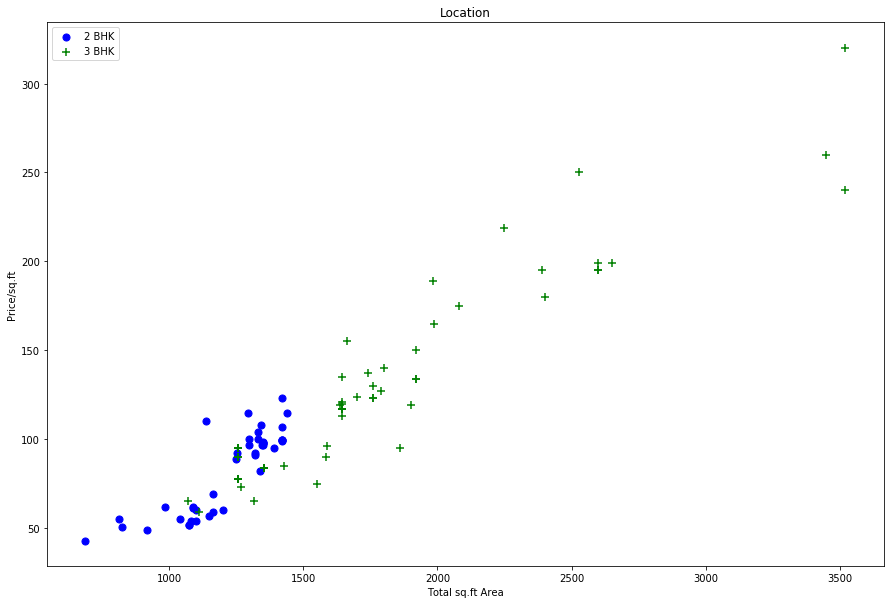

In [53]:
def plot_scatter(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'green', label = '3 BHK', s = 50, marker = '+')
    plt.xlabel('Total sq.ft Area')
    plt.ylabel('Price/sq.ft')
    plt.title('Location')
    plt.legend()
    
plot_scatter(df, 'Hebbal')

We should also remove properties where for same location, the price of(for example)3 bedroom apartment is less than 2 bedroom apartment(with same sq.ft area).What we will do for a given location, we will build a dictionary of stats per bhk, i.e,

    {
        '1' : {
            'mean': 4000,
            'std': 2000,
            'count': 34
         },
         
         '2' : {
            'mean': 4300,
            'std': 2300,
            'count': 22
         },
        
     }
     
Now we can remove those 2 BHK apartments whose price_per_sqft is less than 1BHK aprtment

In [54]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df = remove_bhk_outliers(df)
df.shape

(7317, 7)

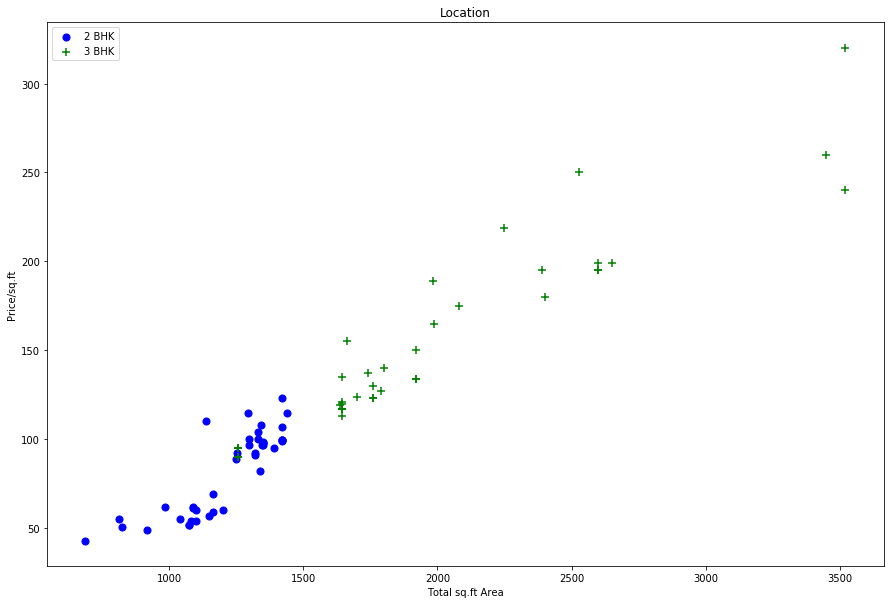

In [55]:
plot_scatter(df, 'Hebbal')

In [56]:
# now see the plot, outliers are removed
# now we make histogram

Text(0, 0.5, 'Count')

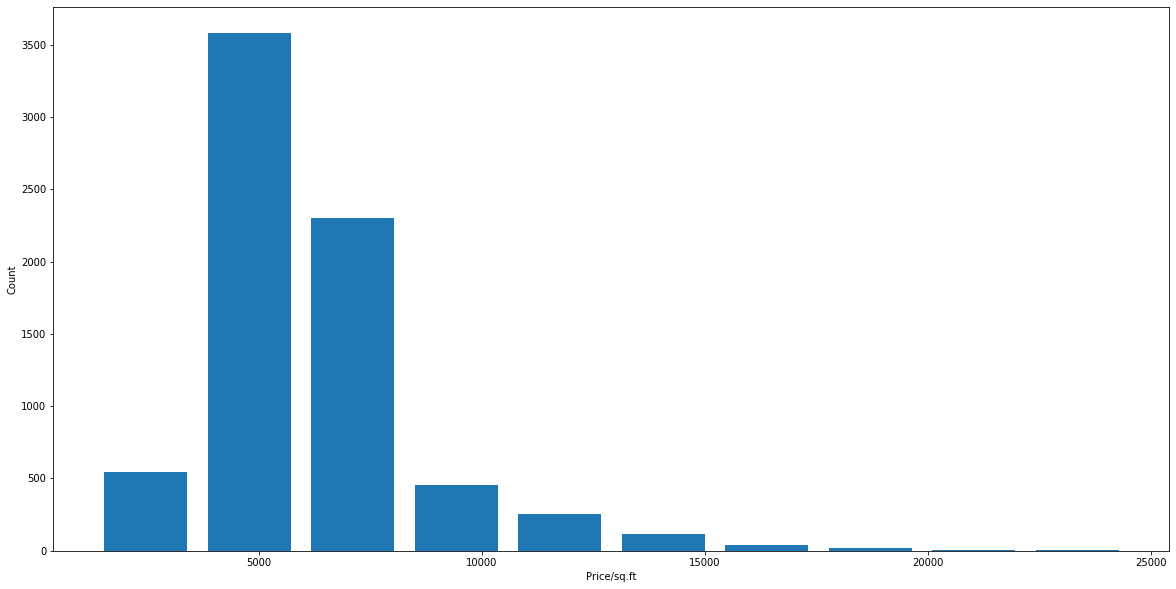

In [57]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price/sq.ft")
plt.ylabel('Count')

In [58]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [59]:
df[df.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [60]:
# now make hist for bath

Text(0, 0.5, 'Count')

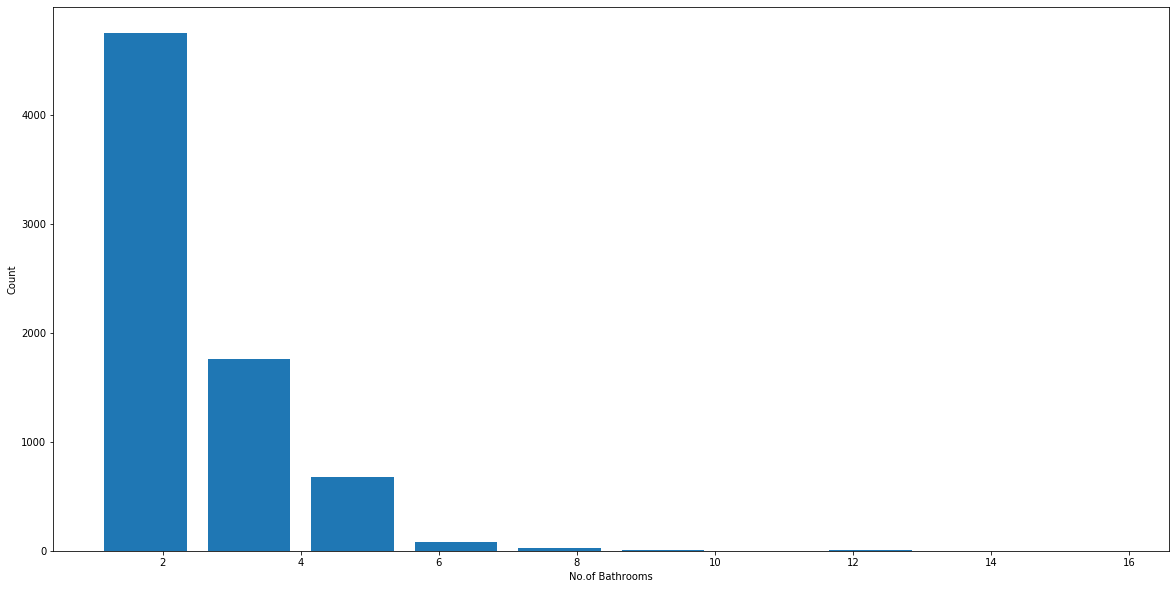

In [61]:
plt.hist(df.bath, rwidth = 0.8)
plt.xlabel('No.of Bathrooms')
plt.ylabel('Count')

In [62]:
df.bhk

0        4
1        3
2        3
3        3
4        2
        ..
10233    2
10234    1
10237    2
10238    1
10241    4
Name: bhk, Length: 7317, dtype: int64

In [63]:
df[df.bath>df.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [64]:
# In the bath histogram, the bath >= 10 haves very less count, so we remove it

In [65]:
df = df[df.bath<df.bhk+2]
df.shape

(7239, 7)

In [66]:
# Then we no need of the size and price_per_sqft column

df = df.drop(['size', 'price_per_sqft'], axis = 1)
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [67]:
df.isna().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

# MODEL FITTING

In [68]:
df.location.nunique()

241

In [69]:
# so first we going convert the categorical value to dummy variables

In [70]:
dummy = pd.get_dummies(df['location'])
dummy.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df = pd.concat([df, dummy.drop('other', axis  =1)], axis = 1)
df.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df.drop('location', axis = 1, inplace = True)

In [74]:
df.shape

(7239, 244)

In [75]:
x = df.drop('price', axis = 1)
y = df.price

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [77]:
# first we check with LinearRegression model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8693244228758383

# Cross value check and Hyper-Parameter Tuning

In [78]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), x, y, cv = cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [79]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x,y):
    algos = {
        'lr' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso' : {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'dt' : {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5, train_size = 0.8, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model(x,y)

,model,best_score,best_params
0,lr,0.847796,{'normalize': False}
1,lasso,0.726738,"{'alpha': 2, 'selection': 'cyclic'}"
2,dt,0.715382,"{'criterion': 'mse', 'splitter': 'best'}"


In [80]:
# here our logisticregression is better than the 2 algos,
# so we go with lr

In [81]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [82]:
np.where(x.columns == 'Vishveshwarya Layout')[0][0]

234

In [83]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]
    
    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1
        
    return lr.predict([X])[0]

In [84]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

88.86221879311547

In [85]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

91.77671802067984

In [86]:
predict_price('1st Phase JP Nagar', 1000, 3, 2)

91.77818274440067

In [87]:
predict_price('1st Phase JP Nagar', 1000, 2, 3)

88.86075406939464

In [88]:
predict_price('Indira Nagar', 1000, 2, 2)

179.17821457349368

In [89]:
predict_price('Indira Nagar', 1000, 3, 2)

182.09417852477884

In [90]:
predict_price('Indira Nagar', 1000, 3, 3)

182.09271380105804

In [91]:
# That's it. we have done it

# Saving our MODEL

In [92]:
import pickle
with open('.\\Model\\Real_Estate_Prediction_pickle', 'wb') as f:
    pickle.dump(lr,f)

In [93]:
import joblib
joblib.dump(lr, '.\\Model\\Real_Estate_Prediction_joblib')

['.\\Model\\Real_Estate_Prediction_joblib']

In [94]:
with open('.\\Model\\Real_Estate_Prediction_pickle', 'rb') as f:
    p = pickle.load(f)

In [95]:
p.intercept_

-4.687044276161274

In [96]:
j = joblib.load('.\\Model\\Real_Estate_Prediction_joblib')

In [99]:
j.coef_

array([ 7.96844259e-02,  2.91596395e+00, -1.46472372e-03,  1.10403234e+02,
        8.03583876e+00, -5.93985980e+01,  1.01945897e+02, -8.90396192e+01,
       -3.89650206e+01, -1.51770270e+01, -1.73725885e+01, -4.26807957e+01,
       -4.32297163e+01, -3.58791751e+01, -5.28391978e+01, -4.35821851e+01,
       -2.76368332e+01, -3.05582586e+01, -3.40867391e+01, -4.27638875e+01,
       -4.48954483e+01, -3.68288526e+01, -5.74810090e+01, -4.40139924e+01,
       -3.60412746e+01, -3.45261510e+01, -3.17375447e+01,  2.08283300e+01,
       -3.71380556e+01, -5.30502472e+01, -3.00739089e+01, -1.46179720e+01,
       -3.25335483e+01,  8.07620613e+01, -3.14572367e+01, -5.83744327e+01,
       -8.95390208e+01, -2.99682541e+01, -2.93794098e+01, -1.26749458e+01,
       -3.19114936e+01,  3.01172216e+01,  1.21312523e+01, -5.11732552e+01,
       -5.87091657e+01, -5.64598093e+01, -3.30249770e+01,  1.47223798e+02,
       -4.32168758e+01, -2.93036395e+01, -2.42520974e+01,  3.48446561e+00,
       -3.84598621e+01, -

In [100]:
import json
columns = {
    'data_columns': [col.lower() for col in x.columns]
}
with open('.\\Model\\columns_json', 'w') as f:
    f.write(json.dumps(columns))